In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium

In [2]:
events = pd.read_csv('events_data_source.csv')
gender = pd.read_csv('gender_age_train.csv')
brand = pd.read_csv('phone_brand_device_model.csv')

In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [4]:
events.shape

(3252950, 7)

In [5]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [6]:
gender.shape

(74645, 4)

In [7]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [8]:
brand.shape

(87726, 3)

# Replacing missing state values

In [9]:
def replace_missing_state(df):
    missing_state_city = df[df['state'].isnull()]['city'].unique()
    missing_state = []
    for city in missing_state_city:
        missing_state.append(df.loc[df['city'] == city]['state'].unique()[0])
    for i in range(0, len(missing_state)):
        cond = (df['city'] == missing_state_city[i])
        df.loc[cond, 'state'] = df.loc[cond, 'state'].fillna(missing_state[i])
    print('Missing state count: ' + str(df.state.isnull().sum()))

In [10]:
replace_missing_state(events)

Missing state count: 0


In [11]:
df = events[events['state'].isin(['Rajasthan', 'UttarPradesh', 'Haryana', 'Jharkhand', 'Orissa', 'Telangana', 'Assam'])]
df.shape

(370982, 7)

# Replace missing latitude and longitude values

In [12]:
missing_lat = df[df['latitude'].isnull()][['event_id', 'city']]
missing_long = df[df['longitude'].isnull()][['event_id', 'city']]

In [13]:
print(missing_lat.shape)
print(missing_long.shape)

(66, 2)
(66, 2)


In [14]:
for i in range(0, 66):
    df.loc[df['event_id'] == missing_lat.iloc[i, 0], 'latitude'] = df[df['city'] == missing_lat.iloc[i, 1]]['latitude'].mean()
    df.loc[df['event_id'] == missing_long.iloc[i, 0], 'longitude'] = df[df['city'] == missing_long.iloc[i, 1]]['longitude'].mean()

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
df.dropna(inplace=True)
df.isnull().sum()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

# Replacing foreign brand names with english names

In [16]:
brand_name_og = ['华为','小米','三星','魅族','酷派','乐视','联想 ', '努比亚']
brand_name_en = ['Huawei','Xiaomi','Samsung','Meizu','Coolpad','LeEco','Lenovo', 'Nubia']
for i in range(0, 8):
    brand['phone_brand'] = brand['phone_brand'].replace(brand_name_og[i], brand_name_en[i])

Since there was a problem with the overall dataset, we are using the dataset provided by INSAID

In [17]:
df = pd.read_csv('events_data.csv')

In [18]:
df.isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude     0
latitude      0
city          0
state        49
dtype: int64

In [19]:
replace_missing_state(df)
df.isnull().sum()

Missing state count: 0


event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [20]:
df.shape

(370982, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370982 entries, 0 to 370981
Data columns (total 7 columns):
event_id     370982 non-null int64
device_id    370982 non-null int64
timestamp    370982 non-null object
longitude    370982 non-null float64
latitude     370982 non-null float64
city         370982 non-null object
state        370982 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 19.8+ MB


# Merging the data together

In [22]:
df_temp = pd.merge(gender, brand, how='inner', on='device_id')
df_temp.shape

(74617, 6)

In [23]:
merged_df = pd.merge(df, df_temp, how='inner', on='device_id')
merged_df.shape

(370901, 12)

In [24]:
merged_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,616897,4112232520748712732,2016-05-06 23:07:41,78.566758,17.481422,Hyderabad,Telangana,M,23,M23-26,Xiaomi,小米4C
1,2699320,4112232520748712732,2016-05-04 12:34:38,78.566758,17.481422,Hyderabad,Telangana,M,23,M23-26,Xiaomi,小米4C
2,3232372,4112232520748712732,2016-05-04 11:08:31,78.566758,17.481422,Hyderabad,Telangana,M,23,M23-26,Xiaomi,小米4C
3,617054,8845954542270213082,2016-05-07 23:34:30,78.493221,17.476113,Hyderabad,Telangana,M,22,M22-,vivo,X5Pro
4,1440290,8845954542270213082,2016-05-07 23:31:37,78.493221,17.476113,Hyderabad,Telangana,M,22,M22-,vivo,X5Pro


# Observations on the dataset

## 1. Distribution of users across state

In [25]:
unique_set = merged_df.groupby([
    'device_id', 
    'longitude', 
    'latitude', 
    'city', 
    'state', 
    'gender',
    'age',
    'group',
    'phone_brand'
]).count().reset_index()

In [26]:
unique_set.shape

(12497, 12)

Text(0.5, 1.0, 'Distribution of users across state')

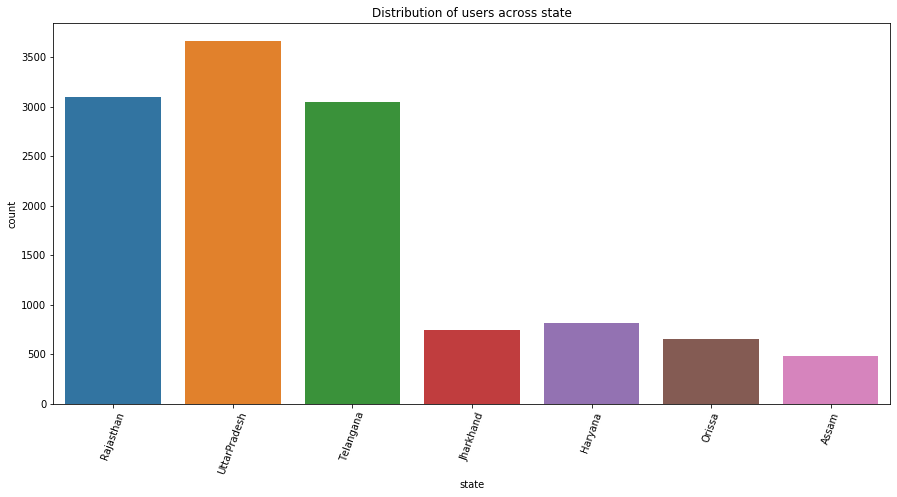

In [27]:
plt.figure(figsize=(15, 7))
user_state_plot = sns.countplot('state', data=unique_set)
plt.xticks(rotation=70)
plt.title('Distribution of users across state')

## 2. Distribution of users across phone brand

In [28]:
temp = unique_set.groupby('phone_brand')['device_id'].count().sort_values(ascending=False)
top10Phone = temp.head(10).reset_index()
temp.head(10)

phone_brand
Xiaomi     3129
Samsung    2785
Huawei     2068
vivo       1117
OPPO        935
Meizu       774
Coolpad     582
HTC         203
Lenovo      137
Nubia        94
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Distribution of users across top 10 phone brand')

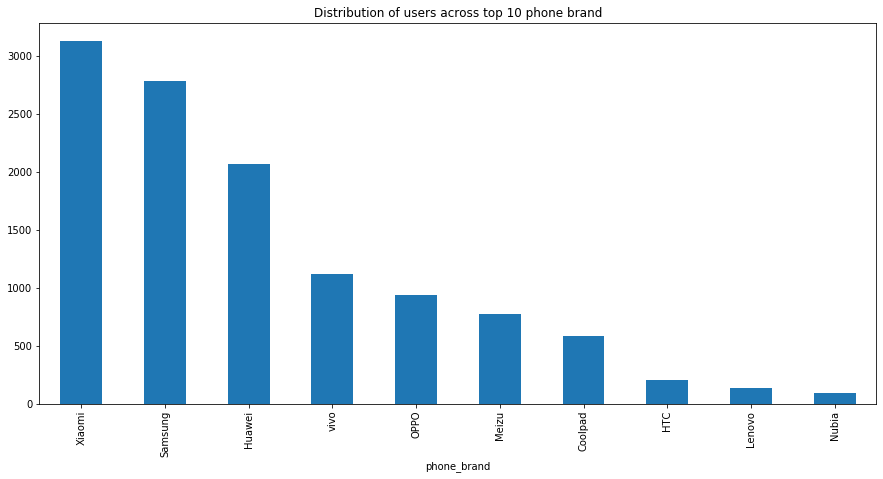

In [29]:
temp.head(10).plot(kind='bar', figsize=(15,7))
plt.title('Distribution of users across top 10 phone brand')

## 3. Distribution of users across gender

Text(0.5, 1.0, 'Distribution of users across gender')

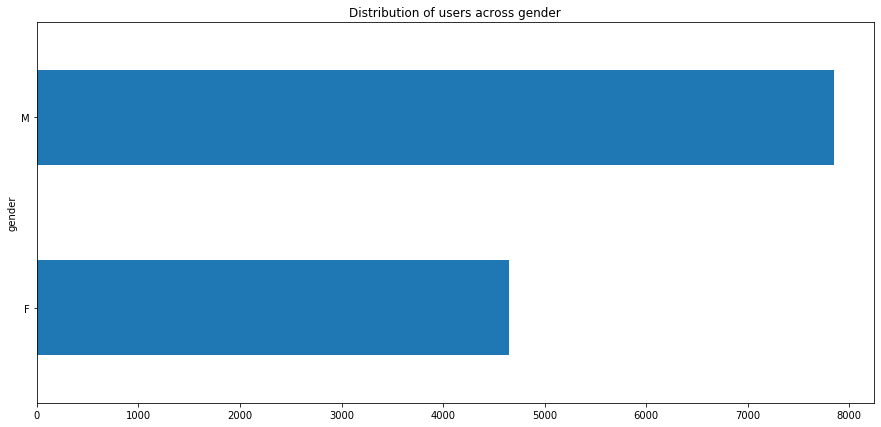

In [30]:
temp = unique_set.groupby('gender')['device_id'].count()
temp.plot.barh(x='gender', y='value', figsize=(15,7))
plt.title('Distribution of users across gender')

## 4. Distribution of users across age segment

Text(0.5, 1.0, 'Distribution of users across age segment')

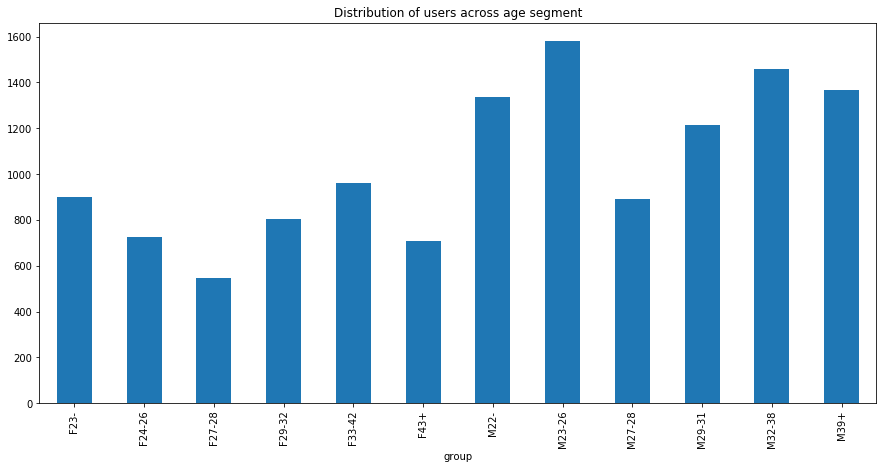

In [31]:
temp = unique_set.groupby('group')['device_id'].count()
temp.plot(kind='bar', figsize=(15,7))
plt.title('Distribution of users across age segment')

## 5. Distribution of Phone brand

In [32]:
top_brand = top10Phone['phone_brand'].to_list()

In [33]:
phone_brand_filter = unique_set[unique_set['phone_brand'].isin(top_brand)]
phone_brand_filter.shape

(11824, 12)

### 5.1 Phone brand against age segment

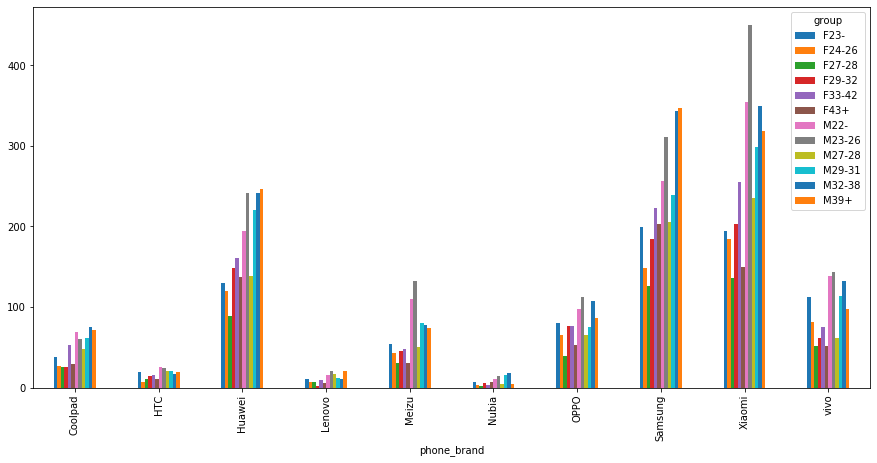

In [34]:
temp = phone_brand_filter.groupby(['phone_brand', 'group']).size().reset_index().pivot(columns='group', index='phone_brand', values=0)
temp.plot.bar(figsize=(15, 7))

### 5.2 Phone brand against gender

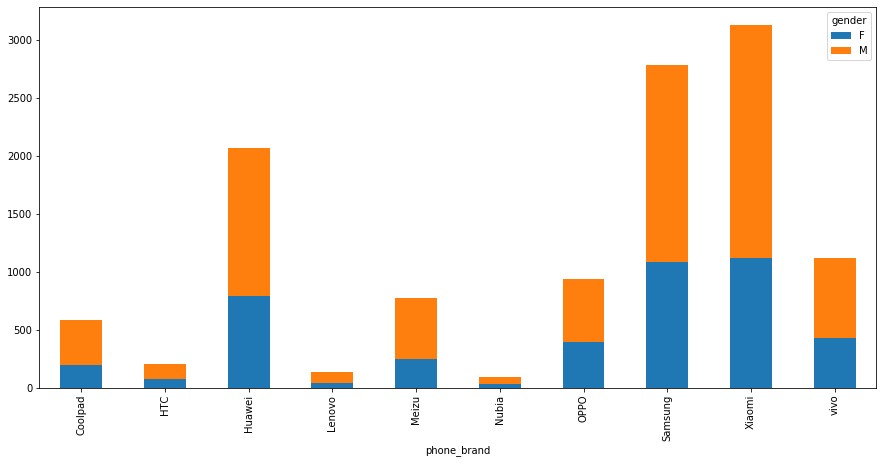

In [35]:
temp = phone_brand_filter.groupby(['phone_brand', 'gender']).size().reset_index().pivot(columns='gender', index='phone_brand', values=0)
temp.plot.bar(stacked=True, figsize=(15, 7))

### 5.3 Phone brand against State

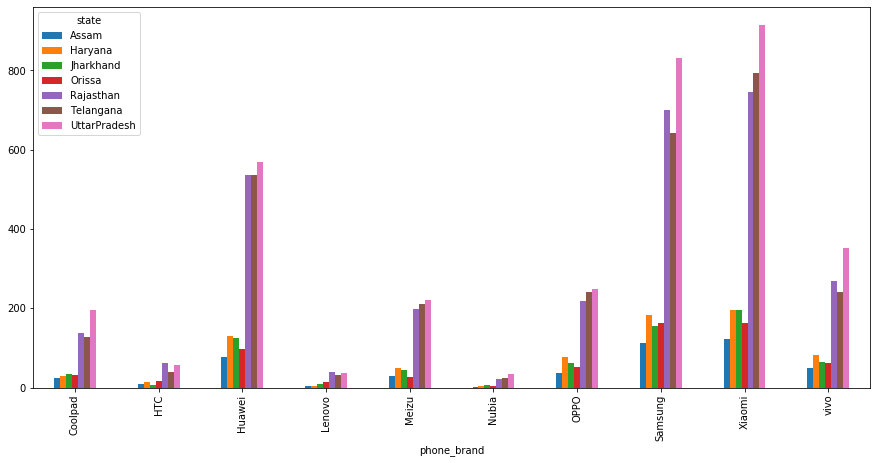

In [36]:
temp = phone_brand_filter.groupby(['phone_brand', 'state']).size().reset_index().pivot(columns='state', index='phone_brand', values=0)
temp.plot.bar(figsize=(15, 7))

## 6. Distribution of Gender

### 6.1 Gender against state

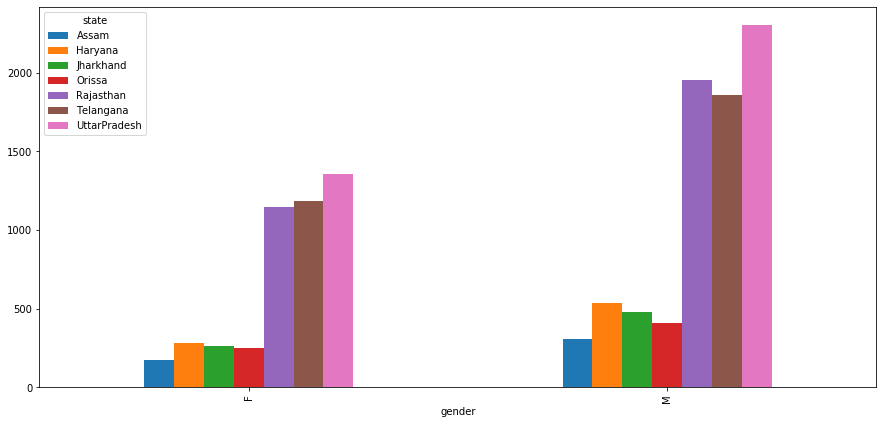

In [37]:
temp = unique_set.groupby(['gender', 'state']).size().reset_index().pivot(columns='state', index='gender', values=0)
temp.plot.bar(figsize=(15, 7))

### 6.2 Gender against age segment

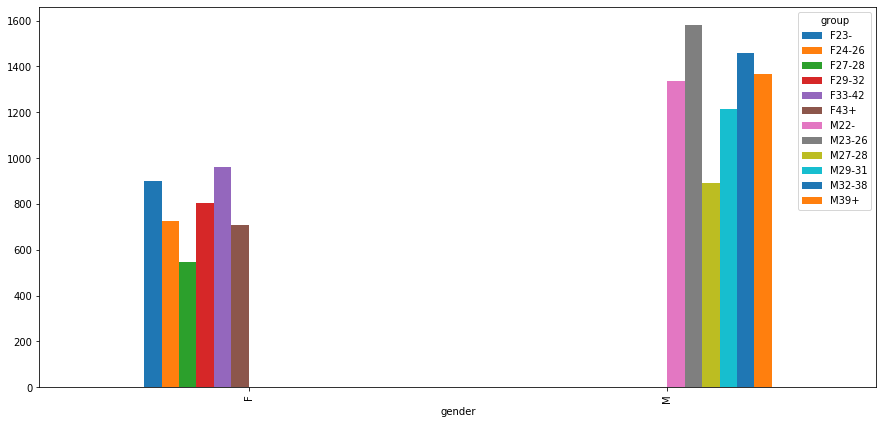

In [38]:
temp = unique_set.groupby(['gender', 'group']).size().reset_index().pivot(columns='group', index='gender', values=0)
temp.plot.bar(figsize=(15, 7))

### 6.3 Gender against Phone brand

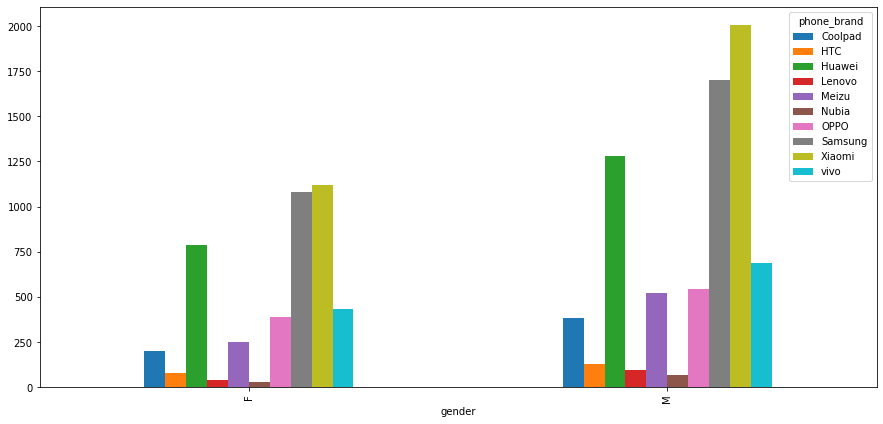

In [39]:
temp = phone_brand_filter.groupby(['gender', 'phone_brand']).size().reset_index().pivot(columns='phone_brand', index='gender', values=0)
temp.plot.bar(figsize=(15, 7))

## 7 Distribution of age segment